In [122]:
# import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is E4C2-09B2

 Directory of C:\Users\AKASH KARMAKAR\data science\Excelr assignment code files\8 RANDOM FOREST

20-03-2022  14:13    <DIR>          .
19-03-2022  00:56    <DIR>          ..
15-03-2022  13:49    <DIR>          .ipynb_checkpoints
15-03-2022  01:44            17,023 Company_Data.csv
15-03-2022  01:44            21,837 Fraud_check.csv
15-03-2022  01:44             1,378 problem statement(company data).txt
15-03-2022  01:44               133 Problem_statement(Fraudcheck).txt
15-03-2022  13:48           876,646 Random Forest company data solution.ipynb
20-03-2022  14:13           329,538 Random Forest fraud check solution.ipynb
               6 File(s)      1,246,555 bytes
               3 Dir(s)  56,814,592,000 bytes free


In [3]:
data=pd.read_csv('Fraud_check.csv')
data.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## EDA

In [4]:
data.shape

(600, 6)

In [5]:
#renaming all the column names 

data.rename({'Undergrad':'undergrd',
            'Marital.Status':'marital_status',
            'Taxable.Income':'tax_income',
            'City.Population':'city_population',
            'Work.Experience':'work_exp',
            'Urban':'urban'}, inplace=True, axis=1)
data.head()

,undergrd,marital_status,tax_income,city_population,work_exp,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## Data visualisation

<AxesSubplot:xlabel='marital_status', ylabel='tax_income'>

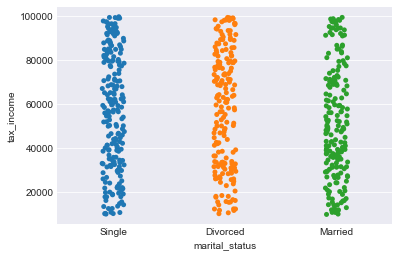

In [6]:
# pattern of tax income
plt.style.use('seaborn-darkgrid')
sns.stripplot(y='tax_income', x='marital_status',data=data, jitter=True)

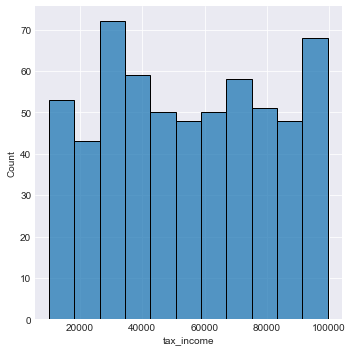

In [7]:
sns.displot(data['tax_income'])


* We can see here that the tax income is almost unifromly distributed 

<AxesSubplot:xlabel='undergrd', ylabel='tax_income'>

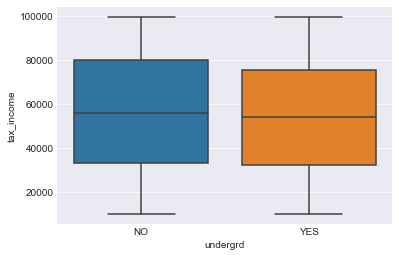

In [8]:
# Marital status vs tax income
sns.boxplot(x=data['undergrd'], y=data['tax_income'])

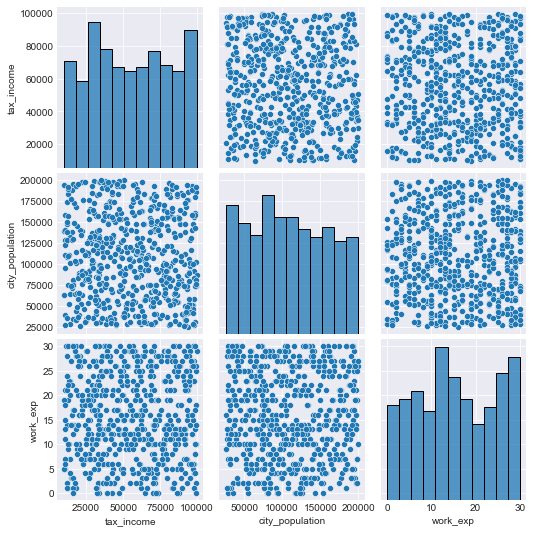

In [9]:
sns.pairplot(data)

* we can observe that all the data are randomly and uniformly distributed in the whole dataset

## Data preprocessing

In [10]:
#converting into label encoders
encoder= LabelEncoder()
data['undergrd']=encoder.fit_transform(data['undergrd'])
data['marital_status']=encoder.fit_transform(data['marital_status'])
data['urban']=encoder.fit_transform(data['urban'])

* coverting all the object values to integer lebels

In [12]:
data.head()

,undergrd,marital_status,tax_income,city_population,work_exp,urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [13]:
data['tax_income']=data['tax_income'].map(lambda x: 1 if x<=30000 else 0)
data.head()

,undergrd,marital_status,tax_income,city_population,work_exp,urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


* in the tax income column all the values which are lass than 30000 as labeled as 1 (risky) adn other s are labeled as 0 (good)

amount of risky data and good data are:
 False    476
True     124
Name: tax_income, dtype: int64


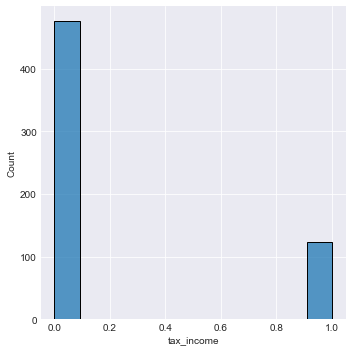

In [14]:
# checking the size of the risky data
sns.displot(data['tax_income'])
print('amount of risky data and good data are:\n', (data['tax_income']==1).value_counts())

- we can observe that out  data is a imbalanced data, fraudulent number of data is only 124
- fraud data is minority class here


## Model building

In [43]:
x= features= data.drop(labels=['tax_income'],axis=1)
y= target=data['tax_income']

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=12, stratify=y)
# here stratify hyper parameter is used to keep the proportion of the 
#dataset same for the train and test data


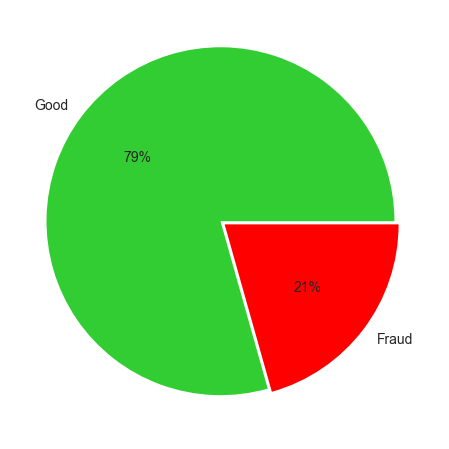

In [36]:
plt.figure(figsize=(8,8))
plt.pie(x= y_train.value_counts(), labels= ['Good', 'Fraud'], autopct='%1.0f%%', explode=[0.03,0], colors=['limegreen', 'red'],  textprops= {'fontsize': 14})
plt.show()

0    381
Name: tax_income, dtype: int64

In [39]:
x_train

,undergrd,marital_status,city_population,work_exp,urban
589,1,1,30774,10,0
291,1,2,62475,26,1
443,1,2,189209,9,0
292,1,2,76406,1,1
257,1,1,31611,17,1
...,...,...,...,...,...
119,0,0,47202,30,1
142,0,2,122654,26,1
226,0,2,77719,28,0
192,1,1,126556,10,1


0    381
1     99
Name: tax_income, dtype: int64

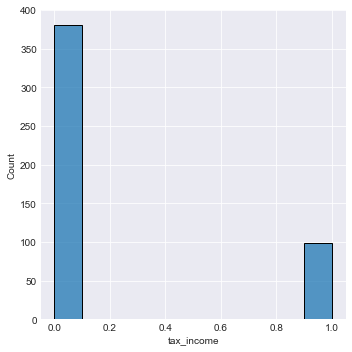

In [41]:
sns.displot(y_train)
y_train.value_counts()

- As the target data is heavily imbalanced we will use upscalling to balance the data

- y_train==0 is good count
- y_train==1 is fraud count

## Applying SMOTE

In [80]:
from imblearn.combine import SMOTETomek

In [86]:
smk=SMOTETomek(random_state=12)
x_adj, y_adj=smk.fit_resample(x,y)

print(f'original dataframe shape of features(x) = {x.shape} and target(y) = {y.shape}')
print(f'resampled dataframe shape of features(x) = {x_adj.shape} and target(y) = {y_adj.shape}')

original dataframe shape of features(x) = (600, 5) and target(y) = (600,)
resampled dataframe shape of features(x) = (708, 5) and target(y) = (708,)


0    354
1    354
Name: tax_income, dtype: int64

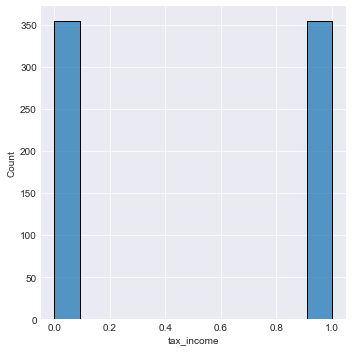

In [89]:
sns.displot(y_adj)
y_adj.value_counts()


## Again biuld the model with x_adj and y_adj

In [92]:
x_train_adj, x_test_adj, y_train_adj, y_test_adj = train_test_split(x_adj, y_adj, test_size=0.2, random_state=12, stratify=y_adj)
# using the stratify parameter to equal the ratio of good and fraud data in both original and train test data

print(x_train_adj.shape, y_train_adj.shape)


(566, 5) (566,)


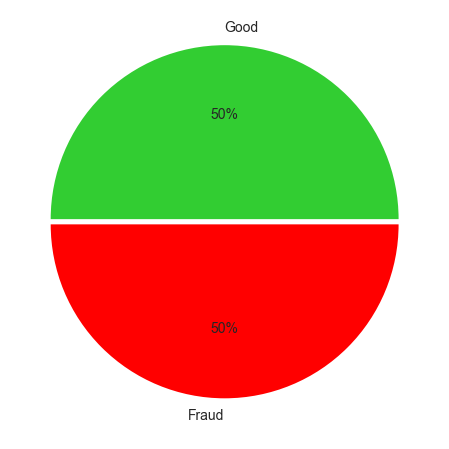

In [93]:
plt.figure(figsize=(8,8))
plt.pie(x= y_adj.value_counts(), labels= ['Good', 'Fraud'], autopct='%1.0f%%', explode=[0.03,0], colors=['limegreen', 'red'],  textprops= {'fontsize': 14})
plt.show()

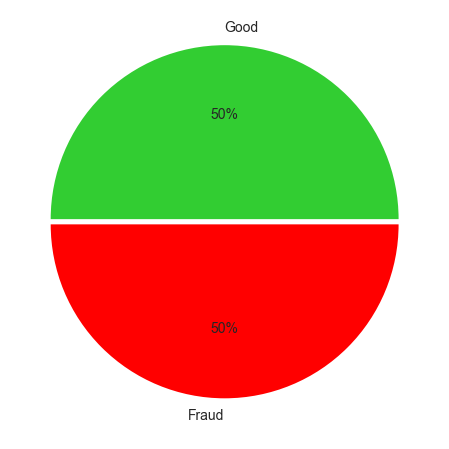

In [94]:
plt.figure(figsize=(8,8))
plt.pie(x= y_train_adj.value_counts(), labels= ['Good', 'Fraud'], autopct='%1.0f%%', explode=[0.03,0], colors=['limegreen', 'red'],  textprops= {'fontsize': 14})
plt.show()

- Here we have successfully balanced the data

In [ ]:
## Model training with Random forest ensemble technique 

#  applying randomised search cv

# from sklearn.model_selection import RandomizedSearchCV


# rf_model2=RandomForestClassifier()

# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]

# max_features = ['auto', 'sqrt']
# criterion=['gini','entropy']
# max_depth = [int(x) for x in np.linspace(3, 20, num = 15)]
# max_depth.append(None)

# min_samples_split = [2, 4, 6]

# min_samples_leaf = [1, 2, 4]

# bootstrap = [True, False]

# hp_grid = {'n_estimators': n_estimators,
#            'criterion': criterion,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(hp_grid)

# rf_rand=RandomizedSearchCV(estimator=rf_model2, param_distributions=hp_grid)
# rf_rand.fit(x_train_adj, y_train_adj,)


# print(rf_rand.best_score_)
# print(rf_rand.best_params_)


# # parsing all the hyperparameters obtained from the randomised search cv 
# rf_model2=RandomForestClassifier(n_estimators= 100, min_samples_split= 6, min_samples_leaf= 1, max_features= 'auto', max_depth= 13, bootstrap= True, criterion='gini')
# rf_model2.fit(x_train_adj,y_train_adj)

## Model training

In [123]:
rf_model=RandomForestClassifier(n_estimators=30, min_samples_split=5, max_depth=4)
rf_model.fit(x_train_adj, y_train_adj)

RandomForestClassifier(max_depth=4, min_samples_split=5, n_estimators=30)

## Model accuracy testing

In [124]:
y_adj_train_pred=rf_model2.predict(x_train_adj)
y_adj_test_pred=rf_model2.predict(x_test_adj)


print('accuracy score for the train data : ',accuracy_score(y_train_adj, y_adj_train_pred))
print('accuracy score for the test data :', accuracy_score(y_test_adj, y_adj_test_pred))


print('after tweaking the hyperparameters the accuracies are as below:')
print('======================\n\n')

# y_train_pred=rf_model.predict(x_train)
# y_test_pred=rf_model.predict(x_test)
print('Report for the train data')
print('********************************')
print('accuracy score for the train data : \n',accuracy_score(y_train_adj, y_adj_train_pred))
print('confusion matrics for train data :\n', confusion_matrix(y_train_adj, y_adj_train_pred))
print('calssification report for train data :\n', classification_report(y_train_adj, y_adj_train_pred))


print('\n\n\n********************************')
print('********************************')
print('********************************\n\n\n')

print('accuracy score for the test data :\n', accuracy_score(y_test_adj, y_adj_test_pred))
print('confusion matrics for train data :\n', confusion_matrix(y_test_adj, y_adj_test_pred))
print('calssification report for train data :\n', classification_report(y_test_adj, y_adj_test_pred))

accuracy score for the train data :  0.9469964664310954
accuracy score for the test data : 0.7605633802816901
after tweaking the hyperparameters the accuracies are as below:


Report for the train data
********************************
accuracy score for the train data : 
 0.9469964664310954
confusion matrics for train data :
 [[267  16]
 [ 14 269]]
calssification report for train data :
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       283
           1       0.94      0.95      0.95       283

    accuracy                           0.95       566
   macro avg       0.95      0.95      0.95       566
weighted avg       0.95      0.95      0.95       566




********************************
********************************
********************************



accuracy score for the test data :
 0.7605633802816901
confusion matrics for train data :
 [[48 23]
 [11 60]]
calssification report for train data :
               precision    

## Initially the data was very imbalanced so we used SMOTE technique to balance the data and with random forest got this above mentioned accuracy.